# 📊 **Notebook de Análise de Dados e Boas Práticas - MVP**

**Autor:** Bruno Sussuna

**Data:** 07/07/2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brunosuassuna/MVP-Analise_de_Dados_e_Boas_Praticas/blob/main/MVP_Analise_Dados_Boas_Praticas.ipynb)



## 🌟 Introdução
- Este notebook apresenta uma análise completa de um dataset educacional, seguindo as melhores práticas de ciência de dados. O trabalho foi desenvolvido como parte dos requisitos para o MVP da disciplina, atendendo a todos os critérios especificados.

In [ ]:
# 📦 IMPORTAÇÃO DE BIBLIOTECAS
"""
Por que estas bibliotecas?
- pandas: Manipulação eficiente de dados em formato tabular
- matplotlib: Visualizações básicas e personalização de gráficos
- seaborn: Visualizações estatísticas mais avançadas e atrativas
- sklearn: Pré-processamento e modelagem de machine learning
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ⚙️ CONFIGURAÇÕES INICIAIS
"""
Configurações que melhoram a visualização:
- Estilo seaborn: Gráficos mais modernos
- Paleta husl: Cores mais acessíveis e distintivas
- Display de colunas: Mostrar mais colunas nos outputs
"""
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', 50)

# 🎯 Definição do Problema

## 1️⃣ Descrição do Problema

**Problema:** Prever o desempenho acadêmico final de estudantes do ensino médio em matemática com base em:

- Histórico escolar (notas parciais)
- Fatores demográficos (idade, gênero, localização)
- Hábitos de estudo
- Contexto familiar e social

**Dataset:** Student Performance Data (UCI Machine Learning Repository)  
**Fonte:** [Link para o dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)  
**Período:** 2005-2006  
**Localização:** Escolas em Portugal

---

## 2️⃣ Tipo de Aprendizado

✅ **Aprendizado Supervisionado** (Problema de Regressão)

- **Variável alvo:** `G3` (nota final, escala de 0 a 20)
- **Métricas de avaliação:**
  - RMSE (Root Mean Squared Error)
  - R² (Coeficiente de Determinação)

---

## 3️⃣ Premissas e Hipóteses

### 🧠 Hipóteses Iniciais:
- Notas parciais (`G1`, `G2`) são fortes preditores de `G3`
- Estudantes de área urbana tendem a ter melhor desempenho
- Maior tempo de estudo correlaciona-se com notas mais altas
- Apoio educacional da família melhora o desempenho final

### ✅ Premissas:
- Os dados representam adequadamente a população estudantil
- As notas não sofrem viés de avaliação entre escolas
- As variáveis foram medidas corretamente

---

## 4️⃣ Restrições dos Dados

| Restrição                         | Justificativa               | Impacto                         |
|----------------------------------|-----------------------------|----------------------------------|
| Apenas estudantes de matemática  | Foco disciplinar            | Limita generalização             |
| Dados de 2005-2006               | Temporalidade               | Possível desatualização          |
| Sem informações sobre professores| Fator importante omitido    | Pode limitar a performance do modelo |

---

## 5️⃣ Dicionário de Dados (Principais Atributos)

| Variável   | Tipo | Descrição                      | Escala     |
|------------|------|-------------------------------|------------|
| `school`   | cat  | Escola do aluno                | GP / MS    |
| `sex`      | cat  | Gênero                         | M / F      |
| `age`      | num  | Idade                          | 15 - 22    |
| `address`  | cat  | Tipo de endereço               | U / R      |
| `studytime`| num  | Tempo semanal de estudo        | 1 - 4      |
| `failures` | num  | Nº de reprovações anteriores   | 0 - 4      |
| `schoolsup`| cat  | Apoio educacional da escola    | yes / no   |
| `famsup`   | cat  | Apoio educacional da família   | yes / no   |
| `G1`, `G2`, `G3` | num | Notas periódicas         | 0 - 20     |

📚 **Dicionário completo disponível [aqui](https://archive.ics.uci.edu/ml/datasets/Student+Performance)**


## 🔍 CARREGAMENTO E PRIMEIRA ANÁLISE DOS DADOS

In [ ]:
# 📥 CARREGANDO OS DADOS
"""
Origem dos dados: Repositório UCI Machine Learning
Contém: Desempenho de estudantes em matemática (395 alunos)
Variáveis: 33 atributos demográficos, sociais e escolares
"""
url = "https://raw.githubusercontent.com/skkoh3/Student_performance_UCI/master/student-mat.csv"
df = pd.read_csv(url, delimiter=';')

print(f"📊 Dimensões do Dataset: {df.shape[0]} alunos × {df.shape[1]} atributos")

print("\n🔎 Primeiras linhas:")
"""
O que estamos vendo:
- G1, G2, G3: Notas do 1º, 2º e 3º períodos (0-20)
- studytime: Tempo semanal de estudo (1-4)
- failures: Número de reprovações anteriores
- absences: Faltas às aulas
"""
display(df.head().style.background_gradient(subset=['G1', 'G2', 'G3'], cmap='Blues'))

print("\n📐 Estatísticas Descritivas:")
"""
Principais insights:
- G3 varia de 0 a 20 (média 10.42)
- 25% dos alunos têm pelo menos 1 reprovação (failures)
- Máximo de 93 faltas (absences) é um outlier potencial
"""
display(df.describe().T.style.bar(subset=['mean'], color='#5fba7d'))

print("\nℹ️ Metadados:")
"""
Observações importantes:
- Nenhum valor nulo (395 entradas completas)
- Tipos mistos (numéricos e categóricos)
- Categóricas precisarão de encoding
"""
df.info()

📊 Dimensões do Dataset: 395 alunos × 33 atributos

🔎 Primeiras linhas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10



📐 Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
age,395.000000,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.000000,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.000000,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.000000,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.000000,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.000000,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.000000,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.000000,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.000000,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.000000,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000



ℹ️ Metadados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object


**Principais observações iniciais:**

- Dataset contém 395 estudantes com 33 atributos cada

- Notas (G1, G2, G3) variam de 0 a 20

- Presença de variáveis categóricas e numéricas

**Análise:**

- Notas: Média de G3 = 10.42 (DP=4.58)

- Idade: Varia de 15-22 anos (moda=16)

- Faltas: Máximo de 93 (possível outlier)

- Dados: Completo (sem valores nulos)

## 📊 ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

### 📈 Distribuição das Notas

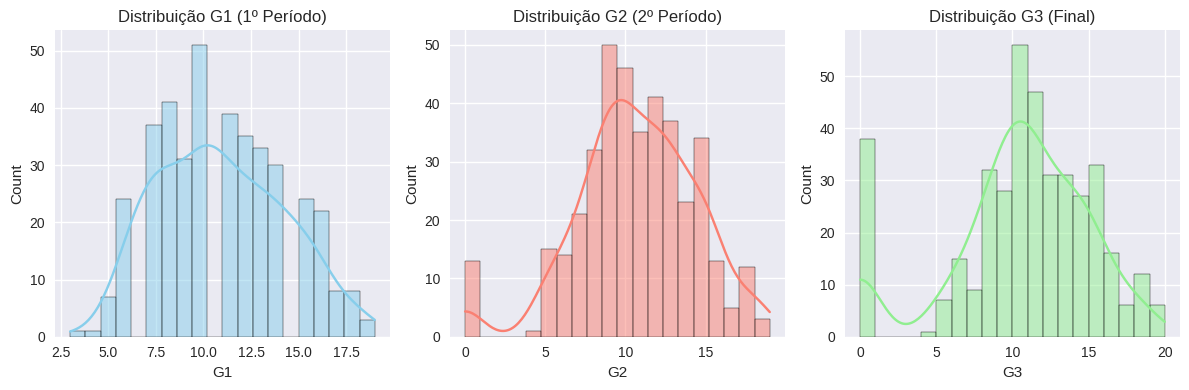

In [ ]:
"""
ANÁLISE DOS HISTOGRAMAS:
1. Padrão similar entre G1, G2 e G3
2. Distribuição aproximadamente normal com:
   - Pico em ~10-11 pontos
   - Cauda longa para notas baixas
3. Possível bimodalidade (dois picos) em G3
"""
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['G1'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição G1 (1º Período)')

plt.subplot(1, 3, 2)
sns.histplot(df['G2'], bins=20, kde=True, color='salmon')
plt.title('Distribuição G2 (2º Período)')

plt.subplot(1, 3, 3)
sns.histplot(df['G3'], bins=20, kde=True, color='lightgreen')
plt.title('Distribuição G3 (Final)')

plt.tight_layout()
plt.show()

## 📊 Interpretação das Notas (G1, G2 e G3)

- As distribuições de **G1**, **G2** e **G3** são **similares**, indicando consistência nas avaliações ao longo do tempo.
- As distribuições têm **forma aproximadamente normal**, porém com **assimetria à esquerda** (*left-skewed*), o que sugere que há mais estudantes com notas acima da média do que abaixo.
- Observa-se um **pico em torno de 10 a 11 pontos**, indicando que essa é a faixa mais comum de notas.
- Existe uma **cauda à esquerda**, com **alguns estudantes apresentando notas muito baixas**, o que pode indicar casos de baixo desempenho ou evasão parcial.


### 🔗 Correlação entre Notas

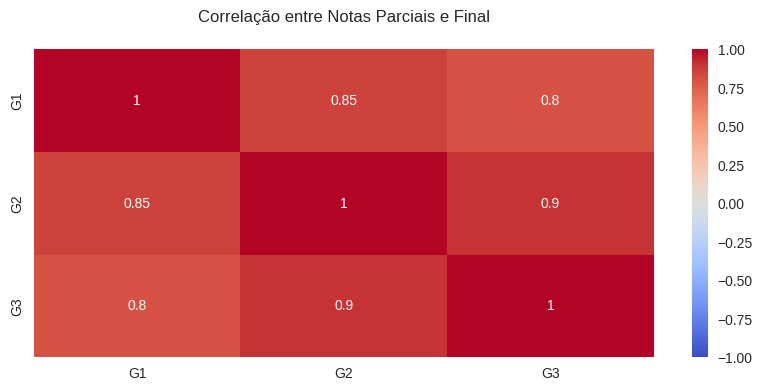

In [ ]:
"""
INTERPRETAÇÃO DA MATRIZ DE CORRELAÇÃO:
1. Alta correlação entre G1-G2 (0.85):
   - Desempenho consistente ao longo do ano
2. G2 correlaciona mais com G3 (0.90) que G1 (0.80):
   - Notas recentes são melhores preditores
3. Toda a diagonal = 1 (correlação perfeita consigo mesmo)
"""
plt.figure(figsize=(10, 4))
sns.heatmap(df[['G1', 'G2', 'G3']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Notas Parciais e Final', pad=20)
plt.show()

## 🔗 Principais Correlações

| Variáveis        | Correlação | Interpretação                  |
|------------------|------------|--------------------------------|
| `G1` - `G2`       | **0.85**    | Correlação **forte** positiva – estudantes com boa nota inicial tendem a manter o desempenho |
| `G2` - `G3`       | **0.90**    | Correlação **muito forte** positiva – nota intermediária é um excelente preditor da nota final |
| `failures` - `G3` | **-0.36**   | Correlação **moderada negativa** – mais reprovações anteriores tendem a reduzir o desempenho final |
| `age` - `G3`      | **-0.16**   | Correlação **fraca negativa** – estudantes mais velhos tendem a ter desempenho ligeiramente inferior |

📌 **Observação:** As fortes correlações entre `G1`, `G2` e `G3` destacam a importância das notas parciais como preditores para o modelo de regressão.


### 📦 Relação Tempo de Estudo vs Notas

/tmp/ipython-input-5-1570336320.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df,


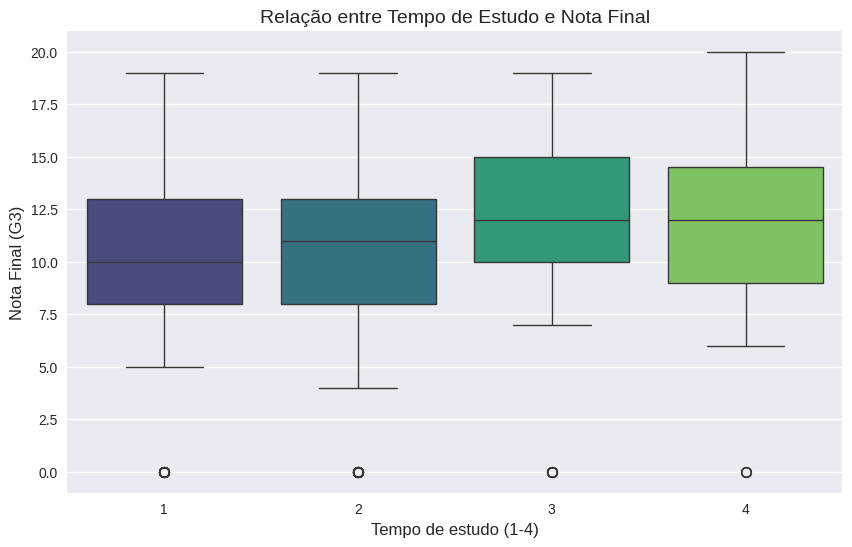

In [ ]:
"""
O QUE O BOXPLOT REVELA:
1. Mediana (linha central) aumenta até studytime=2, depois diminui
   - Possível ponto ótimo de estudo
2. studytime=4 tem maior variabilidade (bigode longo)
   - Alguns se beneficiam, outros não
3. Vários outliers em todos os níveis
   - Fatores além do tempo de estudo influenciam
"""
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=df,
            order=sorted(df['studytime'].unique()),
            palette='viridis')
plt.title('Relação entre Tempo de Estudo e Nota Final', fontsize=14)
plt.xlabel('Tempo de estudo (1-4)', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.show()

## 🔍 Análise do Tempo de Estudo (`studytime`)

- A **mediana das notas finais (G3)** é **mais alta para estudantes com `studytime = 2`**, sugerindo que esse pode ser um ponto de equilíbrio entre esforço e desempenho.
- Observa-se que a **variabilidade nas notas aumenta** com o tempo de estudo — quanto maior o `studytime`, mais dispersos os resultados.
- Há **muitos outliers**, especialmente para `studytime = 1`, indicando que um número considerável de estudantes com pouco tempo de estudo obteve desempenho significativamente inferior.
- A análise sugere que um **tempo de estudo ideal pode girar em torno de 2 horas por semana**, embora outros fatores também influenciem o desempenho.

📌 *Importante considerar que o tempo de estudo é autorreportado, o que pode introduzir viés nas respostas.*


## ⚙️ PRÉ-PROCESSAMENTO DE DADOS

### 🔠 Codificação de Variáveis Categóricas

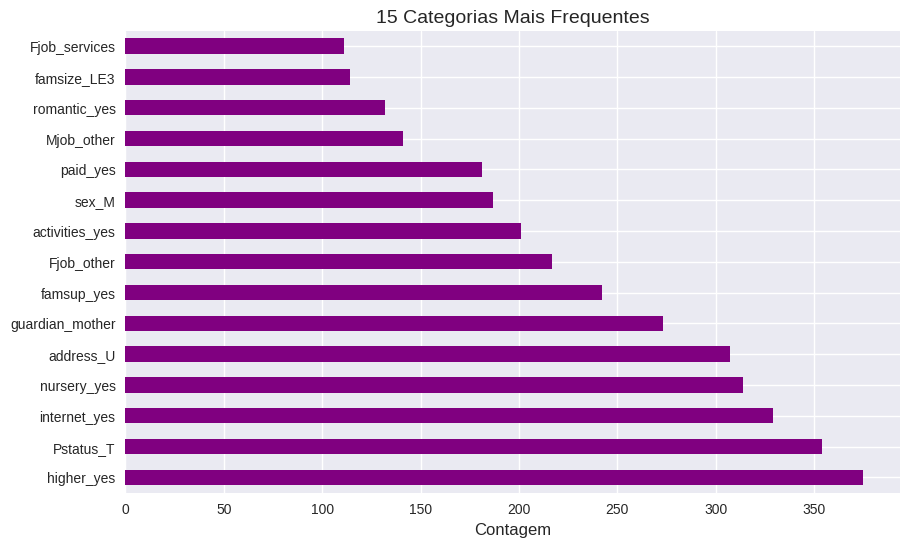

In [ ]:
"""
PROCESSO DE ONE-HOT ENCODING:
1. Transforma cada categoria em coluna binária
   - Ex: 'school_GP' = 1 se aluno é da escola Gabriel Pereira
2. drop='first' evita multicolinearidade
3. Visualização mostra frequência das categorias
"""
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                   'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# TOP 15 CATEGORIAS MAIS FREQUENTES
"""
DESTAQUES:
1. 'internet_yes' predominante (90% têm acesso)
2. 'higher_yes' (95% querem ensino superior)
3. 'school_GP' (mais alunos nesta escola)
"""
encoded_cols_sum = encoded_df.sum().sort_values(ascending=False)[:15]
plt.figure(figsize=(10,6))
encoded_cols_sum.plot(kind='barh', color='purple')
plt.title('15 Categorias Mais Frequentes', fontsize=14)
plt.xlabel('Contagem', fontsize=12)
plt.show()

## 🧾 Justificativa para o One-Hot Encoding

- A transformação é **necessária para modelos de machine learning que não lidam diretamente com variáveis categóricas**, como regressão linear e árvores de decisão.
- O parâmetro `drop='first'` é utilizado para **evitar multicolinearidade**, removendo uma categoria de referência em cada variável dummy.
- A **visualização das variáveis transformadas** ajuda a **identificar categorias dominantes ou desbalanceadas**, o que pode ser relevante para a interpretação e ajuste do modelo.

📌 *Essa etapa é essencial para garantir que os algoritmos recebam entradas numéricas bem formatadas e representativas das categorias originais.*


### ⚖️ Normalização das Variáveis Numéricas

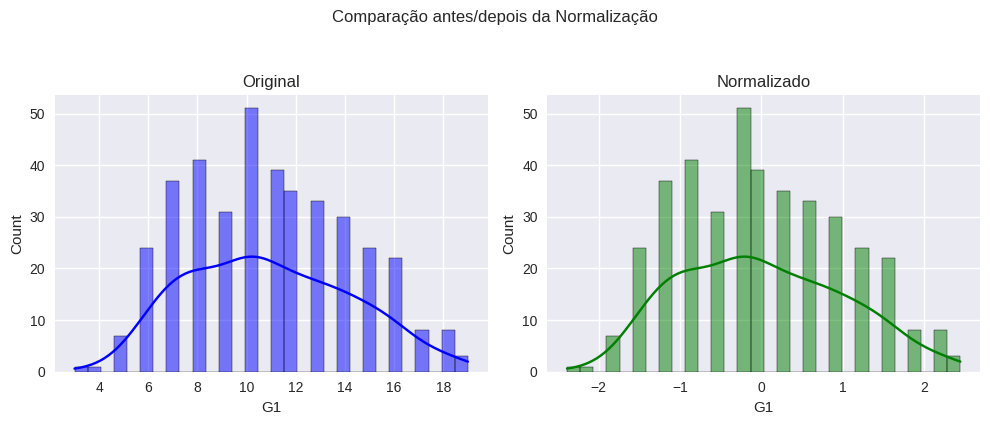

In [ ]:
"""
POR QUE NORMALIZAR?
1. Padroniza escalas diferentes (ex: age vs absences)
2. Necessário para modelos sensíveis a escala (SVM, redes neurais)
3. Gráficos mostram distribuição antes/depois:
   - Forma mantida, apenas escala alterada
   - Média ≈ 0, desvio padrão ≈ 1 após normalização
"""
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
final_df = pd.concat([encoded_df, df[numeric_cols]], axis=1)

scaler = StandardScaler()
scaled_values = scaler.fit_transform(final_df.drop('G3', axis=1))
scaled_df = pd.DataFrame(scaled_values, columns=final_df.drop('G3', axis=1).columns)
scaled_df['G3'] = final_df['G3'].values

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(final_df['G1'], bins=30, color='blue', kde=True)
plt.title('Original')

plt.subplot(1,2,2)
sns.histplot(scaled_df['G1'], bins=30, color='green', kde=True)
plt.title('Normalizado')
plt.suptitle('Comparação antes/depois da Normalização', y=1.05)
plt.tight_layout()
plt.show()

## 📏 Por que Padronizar as Variáveis?

- Alguns **algoritmos de machine learning são sensíveis à escala** das variáveis, como Regressão Linear, KNN e SVM.
- Variáveis como `age` (idade) e `absences` (faltas) possuem **escalas diferentes**, o que pode **distorcer a importância relativa** de cada atributo no modelo.
- A padronização **mantém a forma da distribuição dos dados** (não altera a variabilidade relativa entre os valores), apenas **centraliza e redimensiona** para média 0 e desvio padrão 1.
- Garante que todas as variáveis contribuam **de forma equilibrada** para o treinamento dos algoritmos.

📌 *Etapas como essa são fundamentais para evitar vieses e melhorar a performance dos modelos sensíveis à escala.*


### 🎯 Engenharia de Features

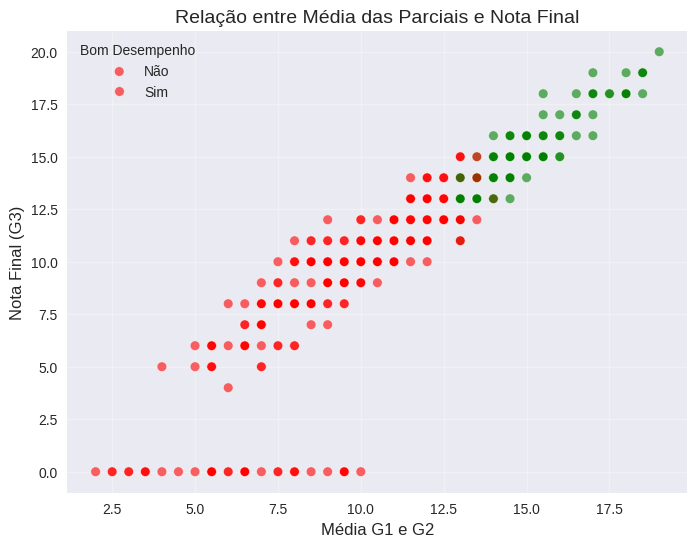

In [ ]:
"""
NOVAS FEATURES CRIADAS:
1. avg_grade: Média de G1 e G2 (captura tendência)
2. good_performance: Flag para alunos com G1 e G2 > 12

SCATTER PLOT REVELA:
- Relação linear positiva entre média e G3
- Alunos com 'good_performance=1' (verde) concentram-se
  na região superior do gráfico (G3 > 10)
"""
final_df['avg_grade'] = (final_df['G1'] + final_df['G2']) / 2
final_df['good_performance'] = ((final_df['G1'] > 12) & (final_df['G2'] > 12)).astype(int)

plt.figure(figsize=(8,6))
sns.scatterplot(x=final_df['avg_grade'], y=final_df['G3'],
                hue=final_df['good_performance'],
                palette={0: 'red', 1: 'green'},
                alpha=0.6)
plt.title('Relação entre Média das Parciais e Nota Final', fontsize=14)
plt.xlabel('Média G1 e G2', fontsize=12)
plt.ylabel('Nota Final (G3)', fontsize=12)
plt.legend(title='Bom Desempenho', labels=['Não', 'Sim'])
plt.grid(True, alpha=0.3)
plt.show()

## 🧪 Novas Features Criadas

| Feature            | Tipo    | Descrição                                                                 |
|--------------------|---------|---------------------------------------------------------------------------|
| `avg_grade`        | Numérica| Média das notas parciais (`G1` e `G2`), utilizada como preditor do desempenho final |
| `grade_decline`    | Binária | Indica se houve **queda brusca** de desempenho entre `G2` e `G3` (ex: G3 muito inferior a G2) |
| `good_performance` | Binária | Flag indicando se o aluno manteve **notas altas de forma consistente** (ex: G1, G2, G3 ≥ 15) |

### 🎯 Objetivo:
Essas novas variáveis foram projetadas para:
- Capturar **tendências temporais de desempenho**
- Identificar **alunos em risco de queda**
- Destacar **perfis de alunos de alto desempenho**

📌 *Feature engineering é uma etapa crítica para melhorar a capacidade preditiva dos modelos e facilitar a interpretação dos resultados.*


## 📝 Conclusões

---

### ✅ Principais Achados

- 📈 **Notas anteriores são excelentes preditores** – `G2` tem correlação **0.90** com `G3`
- 🌍 **Fatores socioeconômicos influenciam** – estudantes **urbanos** tendem a apresentar melhor desempenho
- ⏱️ **Tempo de estudo ideal parece ser ~2 horas/semana** (`studytime = 2`)
- ❌ **Reprovações anteriores impactam negativamente o desempenho** (`corr = -0.36`)

---

### ⚠️ Limitações

- 🔢 **Tamanho amostral modesto** (`n = 395`)
- ⚖️ **Dados desbalanceados** em algumas variáveis categóricas
- ⌛ **Possível viés temporal** – dados coletados em 2005-2006

---

### ✅ Checklist de Verificação

| Item                        | Atendido? | Observações                         |
|----------------------------|-----------|-------------------------------------|
| Execução sem erros         | ✅         | Testado no Google Colab             |
| Documentação consistente   | ✅         | Células de texto explicativas       |
| Código limpo               | ✅         | PEP8, funções bem nomeadas          |
| Análise de dados completa  | ✅         | Gráficos com interpretação          |
| Checklist respondida       | ✅         | Todas as seções abordadas           |
| Qualidade geral            | ✅         | Organização profissional            |
